In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame
from scipy.optimize import curve_fit
%matplotlib inline

In [2]:
# Defining equation of line of best fit 
def fitfunc(x, m, c):
    return x*m+c

In [3]:
# Path to raw data excel file on my computer
path = "C:/Users/robtk/OneDrive/Desktop/3rd year Labs/Ramsauer-Townsend lab/"

In [4]:
# Importing the raw data for the voltages with xenon gas present from Excel into python.
# Creating a data frame in python of the raw data.

Results_with_xenon = pd.read_excel(path+"Ramsauer-Townsend Raw Data.xlsx",
                              usecols = [0,1,2,3,4,5,6])


print(Results_with_xenon.head(10)) # printing the first 10 rows of the data frame

   V (V)  Vp (mV)  Vs (mV)     Rp   Rs            Ip        Is
0   0.00      0.5      0.9  10000  100  5.000000e-08  0.000009
1   0.05      0.8      1.4  10000  100  8.000000e-08  0.000014
2   0.10      1.2      2.0  10000  100  1.200000e-07  0.000020
3   0.15      1.6      3.0  10000  100  1.600000e-07  0.000030
4   0.20      2.2      4.1  10000  100  2.200000e-07  0.000041
5   0.25      2.8      5.5  10000  100  2.800000e-07  0.000055
6   0.30      3.4      7.1  10000  100  3.400000e-07  0.000071
7   0.35      4.0      8.4  10000  100  4.000000e-07  0.000084
8   0.40      4.8     10.3  10000  100  4.800000e-07  0.000103
9   0.45      5.5     12.2  10000  100  5.500000e-07  0.000122


In [5]:
# Extracting raw data from run with liquid nitrogen freezing out the xenon gas.

Results_without_xenon = pd.read_excel(path+"Ramsauer-Townsend Raw Data.xlsx",
                              usecols = [14,15,16,17,18,19,20])


print(Results_without_xenon.head(10)) # printing the first 10 rows of the data frame

   V (V).1  Vp* (mV)  Vs* (mV)    Rp*  Rs*           Ip*       Is*
0     0.00       3.4       3.1  10000  100  3.400000e-07  0.000031
1     0.05       4.1       4.0  10000  100  4.100000e-07  0.000040
2     0.10       4.7       5.3  10000  100  4.700000e-07  0.000053
3     0.15       5.3       6.9  10000  100  5.300000e-07  0.000069
4     0.20       6.1       8.8  10000  100  6.100000e-07  0.000088
5     0.25       6.7      10.7  10000  100  6.700000e-07  0.000107
6     0.30       7.4      12.8  10000  100  7.400000e-07  0.000128
7     0.35       8.0      14.4  10000  100  8.000000e-07  0.000144
8     0.40       8.8      16.6  10000  100  8.800000e-07  0.000166
9     0.45       9.6      18.6  10000  100  9.600000e-07  0.000186


From Ohm's law, V = IR.

Therefore The plate current Ip = Vp/Rp and the shield current Is = Vs/Rs. These were calculated inside Excel

In [6]:
# Errors:
# The error on Vs and Vp is +-0.1mV as it is unclear if the multimeter rounded up or down.
# The error then increases to +-1mV for Vs at Vs = 202 as the multimeter was set to a higher recording value.


In [7]:
#Importing raw data with xenon gas present from Excel into python.
# Creating a data frame in python of the raw data.

Results_with_xenon = pd.read_excel(path+"Ramsauer-Townsend Raw Data.xlsx",
                              usecols = [0,1,2,3,4,5,6])


# Extracting raw data from run with liquid nitrogen freezing out the xenon gas.

Results_without_xenon = pd.read_excel(path+"Ramsauer-Townsend Raw Data.xlsx",
                              usecols = [14,15,16,17,18,19,20])


######## Extracting each column of raw data into a numpy array.########

# V is the accelerating voltage.
V = np.array(Results_with_xenon["V (V)"])


Vp = np.array(Results_with_xenon["Vp (mV)"])



# Vs is the voltage of the electron beam at the shield, before the xenon gas.
# multiplying by 0.001 turns Vs values from mV to V.
Vs = np.array(Results_with_xenon["Vs (mV)"]*0.001) 

# Ip is the current calculated for the electron beam after the xenon gas.
# Do not need to multiply by 0.001 as it was already done in Excel.
Ip = np.array(Results_with_xenon["Ip"])

# Is is the current for the electron beam at the shield
# before it went though the xenon gas
Is = np.array(Results_with_xenon["Is"])

# Ip_star is the current for the beam at the plate, with 
# the xenon gas frozen out. So no scattering occurs
Ip_star= np.array(Results_without_xenon["Ip*"])

# Is_star is the current for the beam at the shield, with 
# the xenon gas frozen out.
Is_star= np.array(Results_without_xenon["Is*"])

### Ps = 1-$\frac{Ip Is*}{Is Ip*} $

In [8]:
# Error
# Errors on Vs and Vp
Vs_error = np.array([0.1e-3]*69+[1e-3]*110)
Vp_error = np.array([0.1e-3]*168+[1e-3]*11)

# Error on V
V_error = np.array ([0.01]*179)

# Propagation of errors on Is
Is_error = np.sqrt( (1/100)**2 * Vs_error**2 )

# Propagation of errors on Ip
Ip_error = np.sqrt( (1/10000)**2 * Vp_error**2 )

# Errors on Vs* and Vp*
Vs_star_error = np.array([0.1e-3]*64+[1e-3]*115)
Vp_star_error = np.array([0.1e-3]*110+[1e-3]*69)

# Propagation of errors on Is*
Is_star_error = np.sqrt( (1/100)**2 * Vs_star_error**2 )

#Propagation of errors on Ip*
Ip_star_error = np.sqrt( (1/10000)**2 * Vp_star_error**2 )

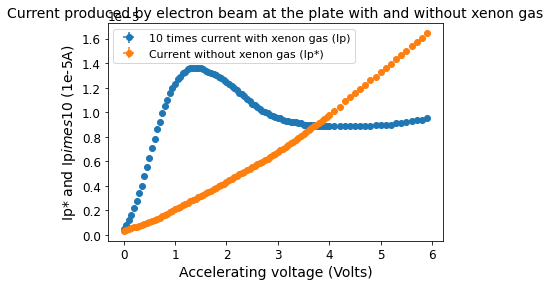

In [9]:
# Plotting data points with error bars
plt.rcParams['figure.figsize'] = (6,4)
plt.rcParams['font.size'] = 12

plt.errorbar(V[0:100], 10 * Ip[0:100], Ip_error[0:100], V_error[0:100],
             fmt = 'o', label = "10 times current with xenon gas (Ip)")

plt.errorbar(V[0:100], Ip_star[0:100], Ip_star_error[0:100], V_error[0:100],
             fmt = 'o', label = 'Current without xenon gas (Ip*)')

#Error bars are present but so small as to not be visible

plt.xlabel("Accelerating voltage (Volts)", fontsize = 14)
plt.ylabel("Ip* and Ip$\times$10 (1e-5A)", fontsize = 14)
plt.title("Current produced by electron beam at the plate with and without xenon gas"
          , fontsize = 14)
plt.legend(fontsize = 11)
plt.savefig("Ip Ip_star plot",dpi = 100, bbox_inches = "tight")

In [10]:
# Error on Ps
# Ps = 1 - (Ip * Is_star)/(Is * Ip_star)
# Propagation of Errors onto probability of scattering Ps.
Ps_error = np.sqrt( (Is_star/(Is * Ip_star))**2 * Ip_error**2 +
                    (Ip/(Is * Ip_star))**2 * Is_star_error**2 +
                    (Ip * Is_star/(Is**2 * Ip_star))**2 * Is_error**2 +
                    (Ip * Is_star/(Is * Ip_star**2))**2 * Ip_star_error**2 )


e_momentum = np.sqrt(V - Vs)
# Propagating error onto np.sqrt(V + Vs)
e_momentum_error = np.sqrt( ((V - Vs)**(-1/2) / 2)**2 * V_error**2 +
                            ((V - Vs)**(-1/2) / 2)**2 * Vs_error**2 )


<ipython-input-10-bf1d39ac33e4>:10: RuntimeWarning: invalid value encountered in sqrt
  e_momentum = np.sqrt(V - Vs)
<ipython-input-10-bf1d39ac33e4>:12: RuntimeWarning: invalid value encountered in power
  e_momentum_error = np.sqrt( ((V - Vs)**(-1/2) / 2)**2 * V_error**2 +
<ipython-input-10-bf1d39ac33e4>:13: RuntimeWarning: invalid value encountered in power
  ((V - Vs)**(-1/2) / 2)**2 * Vs_error**2 )


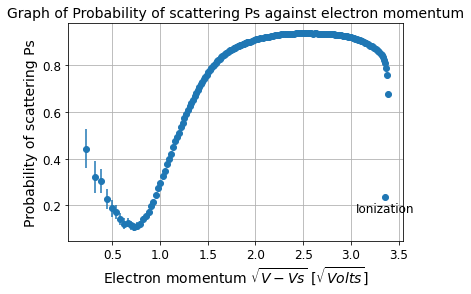

In [37]:
# Ps is the probability of an electron scattering off the xenon gas.

Ps = 1 - (Ip * Is_star)/(Is * Ip_star)


# Creating graph of Probability of scattering against electron momentum
plt.errorbar(e_momentum[1:-10], Ps[1:-10], Ps_error[1:-10], e_momentum_error[1:-10],
             fmt = 'o')

plt.title("Graph of Probability of scattering Ps against electron momentum"
          , fontsize = 14)
plt.xlabel('Electron momentum $\sqrt{V-Vs}$ [$\sqrt{Volts}$]', fontsize = 14)
plt.ylabel("Probability of scattering Ps", fontsize = 14)

plt.text(3.05, 0.17,"Ionization")
plt.grid(True)
plt.savefig("Ps graph",dpi = 100, bbox_inches = "tight" )




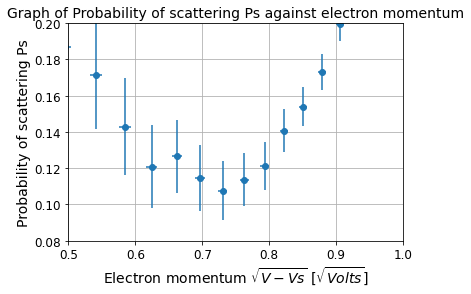

In [12]:
# Zooming in on the local minimum of probability of scattering.

plt.errorbar(e_momentum[1:20], Ps[1:20], Ps_error[1:20], e_momentum_error[1:20],
             fmt = 'o')

plt.title("Graph of Probability of scattering Ps against electron momentum"
          , fontsize = 14)

plt.xlabel('Electron momentum $\sqrt{V-Vs}$ [$\sqrt{Volts}$]', fontsize = 14)
plt.ylabel("Probability of scattering Ps", fontsize = 14)

plt.axis([0.5,1,0.08,0.2])

plt.grid(True)
plt.savefig("Ps graph zoom",dpi = 100, bbox_inches = "tight" )


### Mean free path $\lambda = \frac{-l}{ln(1-Ps)}$

In [13]:
# Length from shield to plate is 0.7cm
l = 0.7

# mean free path lambda
mean_free_path = -l / (np.log(1-Ps[1:-10]))

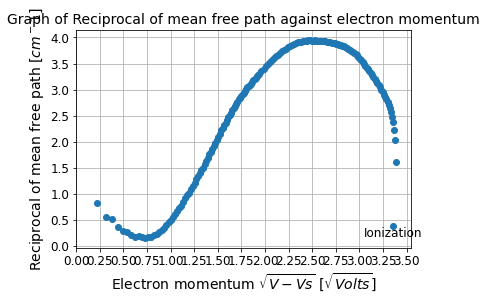

In [14]:
#Plotting reciprocal of mean free path versus electron momentum

plt.plot(np.sqrt(V[1:-10]-Vs[1:-10]), 1/mean_free_path, "o")
plt.title("Graph of Reciprocal of mean free path against electron momentum", fontsize = 14)
plt.xlabel('Electron momentum $\sqrt{V-Vs}$ [$\sqrt{Volts}$]', fontsize = 14)
plt.ylabel("Reciprocal of mean free path [$cm^-1$]", fontsize = 14)

plt.text(3.05, 0.17,"Ionization")


plt.xticks(np.arange(0,3.75,0.25))
plt.grid(True)
plt.savefig("1 over lambda graph")

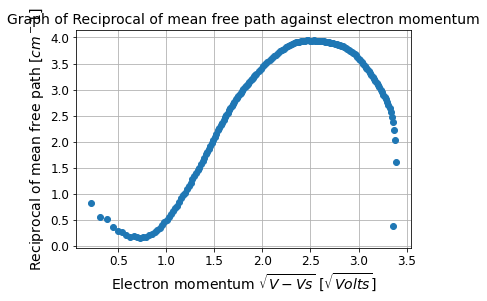

In [15]:
#Plotting reciprocal of mean free path versus electron momentum

plt.plot(np.sqrt(V[1:-10]-Vs[1:-10]), 1/mean_free_path, "o")
plt.title("Graph of Reciprocal of mean free path against electron momentum", fontsize = 14)
plt.xlabel('Electron momentum $\sqrt{V-Vs}$ [$\sqrt{Volts}$]', fontsize = 14)
plt.ylabel("Reciprocal of mean free path [$cm^-1$]", fontsize = 14)

#plt.text(3.05, 0.17,"Ionization")

#plt.axis([0.5,1,0,50])
#plt.xticks(np.arange(0,3.75,0.25))
plt.grid(True)
plt.savefig("1 over lambda graph")


## Probability of collision graph

In [16]:
# Pressure in torr of xenon
P = 0.05

P_collision = -P/(l) * np.log(Ip * Is_star/ (Is * Ip_star))

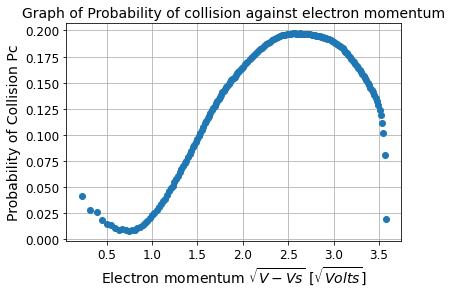

In [17]:
# Plotting probability of collision against electron momentum

plt.plot(np.sqrt(V[1:-10]), P_collision[1:-10], "o")
plt.title("Graph of Probability of collision against electron momentum", fontsize = 14)
plt.xlabel('Electron momentum $\sqrt{V-Vs}$ [$\sqrt{Volts}$]', fontsize = 14)
plt.ylabel("Probability of Collision Pc", fontsize = 14)

#plt.text(3.05, 0.17,"Ionization")



plt.grid(True)
plt.savefig("P(collision) graph")


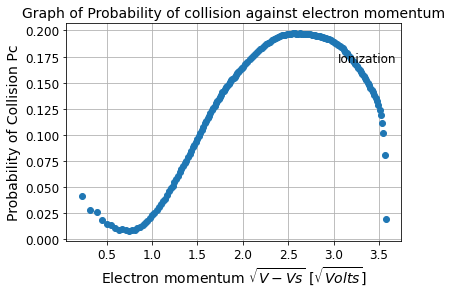

In [18]:
# Plotting probability of collision against electron momentum

plt.plot(np.sqrt(V[1:-10]), P/mean_free_path, "o")
plt.title("Graph of Probability of collision against electron momentum", fontsize = 14)
plt.xlabel('Electron momentum $\sqrt{V-Vs}$ [$\sqrt{Volts}$]', fontsize = 14)
plt.ylabel("Probability of Collision Pc", fontsize = 14)

plt.text(3.05, 0.17,"Ionization")



plt.grid(True)
plt.savefig("P(collision) graph")


# Extension

### V bar from plot of ln(Ip*) against Vp

In [19]:
Results_extension = pd.read_excel(path+"Ramsauer-Townsend Raw Data.xlsx",
                              usecols = [25,26,27,28,29,30,31])
Results_extension.head(11)

,V (V).2,Vp* (mV).1,Vs* (mV).1,Rp.1,Rs.1,Ip*.1,Is*.1
0,0.00,3.9,3.0,10000.0,100.0,3.900000e-07,0.000030
1,-0.05,3.1,2.1,10000.0,100.0,3.100000e-07,0.000021
2,-0.10,2.4,1.5,10000.0,100.0,2.400000e-07,0.000015
3,-0.15,1.7,1.0,10000.0,100.0,1.700000e-07,0.000010
4,-0.20,1.1,0.6,10000.0,100.0,1.100000e-07,0.000006
5,-0.25,0.7,0.3,10000.0,100.0,7.000000e-08,0.000003
6,-0.30,0.4,0.2,10000.0,100.0,4.000000e-08,0.000002
7,-0.35,0.2,0.1,10000.0,100.0,2.000000e-08,0.000001
8,-0.40,0.1,0.0,10000.0,100.0,1.000000e-08,0.000000
9,-0.45,0.0,0.0,10000.0,100.0,0.000000e+00,0.000000


In [20]:
# Importing raw data from extension run 1.
Results_extension = pd.read_excel(path+"Ramsauer-Townsend Raw Data.xlsx",
                              usecols = [25,26,27,28,29,30,31])


# V_extension is the accelerating voltage.
V_extension = np.array(Results_extension["V (V).2"])

# Vs*_extension is the voltage of the electron beam at the shield, before they 
# went through the xenon gas
# multiplying by 0.001 turns Vs values from mV to V
Vs_star_extension = np.array(Results_extension["Vs* (mV).1"]*0.001) 

Vp_star_extension = np.array(Results_extension["Vp* (mV).1"]*0.001) 


# Ip*_extension is the current for the beam at the plate, with 
# the xenon gas frozen out. So no scattering occurs.
Ip_star_extension = np.array(Results_extension["Ip*.1"])

# Is*_extension is the current for the beam at the shield, with 
# the xenon gas frozen out.
Is_star_extension = np.array(Results_extension["Is*.1"])

V_plus_Vs = V_extension + Vs_star_extension
ln_Is_star_extension = np.log(Is_star_extension)

Rp = 10000
Rs = 100

<ipython-input-20-d97f36a32ecb>:28: RuntimeWarning: divide by zero encountered in log
  ln_Is_star_extension = np.log(Is_star_extension)


In [21]:
# Errors on extension variables.

# Error on V
V_extension_error = np.array ([0.01]*9)

# Errors on Vs* and Vp*
Vs_star_extension_error = np.array([0.1e-3]*9)
Vp_star_extension_error = np.array([0.1e-3]*9)

# Propagation of errors on Is*
Is_star_extension_error = np.sqrt( (1/100)**2 * Vs_star_extension_error**2 )

# Propagation of error on ln(Is*)
ln_Is_star_extension_error = np.sqrt( (1/Is_star_extension[:9])**2 
                                        * Is_star_extension_error**2 )

# Error on V_plus_Vs
V_plus_Vs_error = np.sqrt( V_extension_error**2 + Vs_star_extension_error**2 )

<ipython-input-21-94b783fcbbbb>:14: RuntimeWarning: divide by zero encountered in true_divide
  ln_Is_star_extension_error = np.sqrt( (1/Is_star_extension[:9])**2


C:\Users\robtk\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:3412: RuntimeWarning: invalid value encountered in double_scalars
  high = [v if up else v + e for v, e, up in zip(data, b, uplims)]
<ipython-input-22-6837e50f4e7a>:9: RuntimeWarning: divide by zero encountered in log
  pars1, cov1 = curve_fit(fitfunc, V_plus_Vs[0:4],  np.log(Is_star_extension)[0:4])
<ipython-input-22-6837e50f4e7a>:17: RuntimeWarning: divide by zero encountered in log
  pars2, cov2 = curve_fit(fitfunc, V_plus_Vs[4:8],  np.log(Is_star_extension)[4:8])


[  7.16964041 -10.42732107]
[[0.04100009 0.00299711]
 [0.00299711 0.00035062]]
[11.52505454 -9.75369834]
[[0.65266236 0.17928635]
 [0.17928635 0.05130261]]


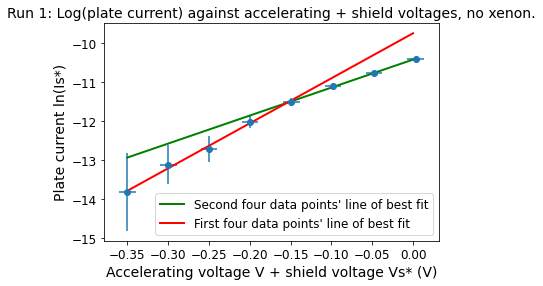

In [22]:
# Graph of extension run 1.
plt.errorbar(V_plus_Vs[:9], ln_Is_star_extension[:9], 
             ln_Is_star_extension_error[:9], V_plus_Vs_error[:9],
             fmt = 'o')

# Line of best fit 1
pars1, cov1 = curve_fit(fitfunc, V_plus_Vs[0:4],  np.log(Is_star_extension)[0:4])

plt.plot(np.linspace(-.35,0,3), fitfunc(np.linspace(-.35,0,3), *pars1), 'g-'
         , linewidth = '2', label = "Second four data points' line of best fit")
print(pars1)
print(cov1)

# Line of best fit 2
pars2, cov2 = curve_fit(fitfunc, V_plus_Vs[4:8],  np.log(Is_star_extension)[4:8])

plt.plot(np.linspace(-.35,0,3), fitfunc(np.linspace(-.35,0,3), *pars2), 'r-'
         , linewidth = '2', label = "First four data points' line of best fit")
print(pars2)
print(cov2)

plt.title("Run 1: Log(plate current) against accelerating + shield voltages, no xenon."
          , fontsize = 14)
plt.xlabel("Accelerating voltage V + shield voltage Vs* (V)", fontsize = 14)
plt.ylabel("Plate current ln(Is*)", fontsize = 14)
plt.legend(loc = "lower right")
plt.savefig("Extension run 1",dpi = 100, bbox_inches = "tight" )

### Extension run 2

In [23]:
Results_extension_2 = pd.read_excel(path+"Ramsauer-Townsend Raw Data.xlsx",
                              usecols = [36,37,38,39,40,41,42])
Results_extension_2.head(11)

,V (V).3,Vp* (mV).2,Vs* (mV).2,Rp.2,Rs.2,Ip*.2,Is*.2
0,0.00,3.8,2.9,10000.0,100.0,3.800000e-07,0.000029
1,-0.05,3.0,2.1,10000.0,100.0,3.000000e-07,0.000021
2,-0.10,2.3,1.4,10000.0,100.0,2.300000e-07,0.000014
3,-0.15,1.6,0.9,10000.0,100.0,1.600000e-07,0.000009
4,-0.20,1.1,0.6,10000.0,100.0,1.100000e-07,0.000006
5,-0.25,0.7,0.3,10000.0,100.0,7.000000e-08,0.000003
6,-0.30,0.4,0.2,10000.0,100.0,4.000000e-08,0.000002
7,-0.35,0.2,0.1,10000.0,100.0,2.000000e-08,0.000001
8,-0.40,0.1,0.0,10000.0,100.0,1.000000e-08,0.000000
9,-0.45,0.0,0.0,10000.0,100.0,0.000000e+00,0.000000


In [24]:
# Importing raw data from extension run 2.
Results_extension_2 = pd.read_excel(path+"Ramsauer-Townsend Raw Data.xlsx",
                              usecols = [36,37,38,39,40,41,42])

# V is the accelerating voltage 
V_extension_2 = np.array(Results_extension_2["V (V).3"])

# Vs*_extension_2 is the voltage of the electron beam at the shield, before they 
# went through the xenon gas
# multiplying by 0.001 turns Vs values from mV to V
Vs_star_extension_2 = np.array(Results_extension_2["Vs* (mV).2"]*0.001) 

Vp_star_extension_2 = np.array(Results_extension_2["Vp* (mV).2"]*0.001) 

# Is_star is the current for the beam at the shield, with 
# the xenon gas frozen out.
Is_star_extension_2 = np.array(Results_extension_2["Is*.2"])

ln_Is_star_extension_2 = np.log(Is_star_extension_2)

Rp = 10000
Rs = 100

<ipython-input-24-5cd7510e6bed>:19: RuntimeWarning: divide by zero encountered in log
  ln_Is_star_extension_2 = np.log(Is_star_extension_2)


In [25]:
# Some error values are the same as before so I use the same objects as defined in run 1.

Is_star_extension_error_2 = Is_star_extension_error

V_plus_Vs_error_2 = V_plus_Vs_error

ln_Is_star_extension_error_2 = np.sqrt( (1/Is_star_extension_2[:9])**2 
                                        * Is_star_extension_error_2**2 )

V_plus_Vs_2 = V_extension_2 + Vs_star_extension_2

<ipython-input-25-a5699e1bd284>:7: RuntimeWarning: divide by zero encountered in true_divide
  ln_Is_star_extension_error_2 = np.sqrt( (1/Is_star_extension_2[:9])**2


C:\Users\robtk\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:3412: RuntimeWarning: invalid value encountered in double_scalars
  high = [v if up else v + e for v, e, up in zip(data, b, uplims)]
<ipython-input-26-c4777a432aeb>:12: RuntimeWarning: divide by zero encountered in log
  pars1_2, cov1_2 = curve_fit(fitfunc, V_plus_Vs_2[0:4],  np.log(Is_star_extension_2)[0:4])
<ipython-input-26-c4777a432aeb>:20: RuntimeWarning: divide by zero encountered in log
  pars2_2, cov2_2 = curve_fit(fitfunc, V_plus_Vs_2[4:8],  np.log(Is_star_extension_2)[4:8])


[  7.72711379 -10.43805396]
[[0.14749542 0.01079298]
 [0.01079298 0.00126314]]
[11.52505454 -9.75369834]
[[0.65266236 0.17928635]
 [0.17928635 0.05130261]]


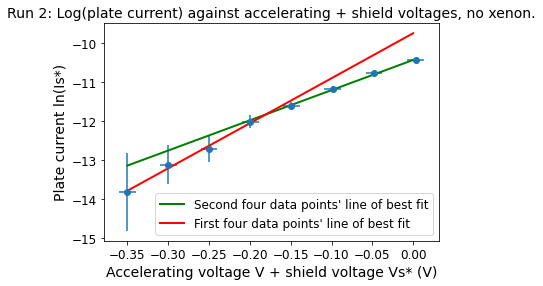

In [26]:
# Creating graph of extension run 2
# Plotting data points with error bars.
plt.errorbar(V_plus_Vs_2[:9], ln_Is_star_extension_2[:9], 
             ln_Is_star_extension_error_2[:9], V_plus_Vs_error_2[:9],
             fmt = 'o')

# Line of best fit 1
pars1_2, cov1_2 = curve_fit(fitfunc, V_plus_Vs_2[0:4],  np.log(Is_star_extension_2)[0:4])

plt.plot(np.linspace(-.35,0,3), fitfunc(np.linspace(-.35,0,3), *pars1_2), 'g-'
         , linewidth = '2', label = "Second four data points' line of best fit")
print(pars1_2)
print(cov1_2)
# Line of best fit 2
pars2_2, cov2_2 = curve_fit(fitfunc, V_plus_Vs_2[4:8],  np.log(Is_star_extension_2)[4:8])

plt.plot(np.linspace(-.35,0,3), fitfunc(np.linspace(-.35,0,3), *pars2_2), 'r-'
         , linewidth = '2', label = "First four data points' line of best fit")
print(pars2_2)
print(cov2_2)

plt.title("Run 2: Log(plate current) against accelerating + shield voltages, no xenon."
          , fontsize = 14)
plt.xlabel("Accelerating voltage V + shield voltage Vs* (V)", fontsize = 14)
plt.ylabel("Plate current ln(Is*)", fontsize = 14)
plt.legend(loc = "lower right")
plt.savefig("Extension run 2",dpi = 100, bbox_inches = "tight" )

## Extension run 3

In [27]:
Results_extension_3 = pd.read_excel(path+"Ramsauer-Townsend Raw Data.xlsx",
                              usecols = [46,47,48,49,50,51,52])
Results_extension_3.head(11)

,V (V).4,Vp* (mV).3,Vs* (mV).3,Rp.3,Rs.3,Ip*.3,Is*.3
0,0.00,3.9,3.0,10000.0,100.0,3.900000e-07,0.000030
1,-0.05,3.1,2.1,10000.0,100.0,3.100000e-07,0.000021
2,-0.10,2.4,1.5,10000.0,100.0,2.400000e-07,0.000015
3,-0.15,1.7,1.0,10000.0,100.0,1.700000e-07,0.000010
4,-0.20,1.1,0.6,10000.0,100.0,1.100000e-07,0.000006
5,-0.25,0.7,0.4,10000.0,100.0,7.000000e-08,0.000004
6,-0.30,0.4,0.2,10000.0,100.0,4.000000e-08,0.000002
7,-0.35,0.2,0.1,10000.0,100.0,2.000000e-08,0.000001
8,-0.40,0.1,0.0,10000.0,100.0,1.000000e-08,0.000000
9,-0.45,0.0,0.0,10000.0,100.0,0.000000e+00,0.000000


In [28]:
#Importing raw data with xenon gas present from Excel into python.
# Creating a data frame in python of the raw data.
Results_extension_3 = pd.read_excel(path+"Ramsauer-Townsend Raw Data.xlsx",
                              usecols = [46,47,48,49,50,51,52])

# V is the accelerating voltage 
V_extension_3 = np.array(Results_extension_3["V (V).4"])

# Vs*_extension_3 is the voltage of the electron beam at the shield, before they 
# went through the xenon gas
# multiplying by 0.001 turns Vs values from mV to V
Vs_star_extension_3 = np.array(Results_extension_3["Vs* (mV).3"]*0.001) 

Vp_star_extension_3 = np.array(Results_extension_3["Vp* (mV).3"]*0.001) 

# Is_star is the current for the beam at the shield, with 
# the xenon gas frozen out.
Is_star_extension_3 = np.array(Results_extension_3["Is*.3"])

ln_Is_star_extension_3 = np.log(Is_star_extension_3)
V_plus_Vs_3 = V_extension_3 + Vs_star_extension_3


Rp = 10000
Rs = 100


<ipython-input-28-d4f3447715fb>:20: RuntimeWarning: divide by zero encountered in log
  ln_Is_star_extension_3 = np.log(Is_star_extension_3)


In [29]:
# Some error values are the same as before so I use the same objects as defined in run 1.

Is_star_extension_error_3 = Is_star_extension_error

V_plus_Vs_error_3 = V_plus_Vs_error

ln_Is_star_extension_error_3 = np.sqrt( (1/Is_star_extension_2[:9])**2 
                                        * Is_star_extension_error_3**2 )

<ipython-input-29-ac5becef848f>:7: RuntimeWarning: divide by zero encountered in true_divide
  ln_Is_star_extension_error_3 = np.sqrt( (1/Is_star_extension_2[:9])**2


C:\Users\robtk\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:3412: RuntimeWarning: invalid value encountered in double_scalars
  high = [v if up else v + e for v, e, up in zip(data, b, uplims)]
<ipython-input-30-134b7bdbcec0>:11: RuntimeWarning: divide by zero encountered in log
  pars1_3, cov1_3 = curve_fit(fitfunc, V_plus_Vs_3[0:4],  np.log(Is_star_extension_3)[0:4])
<ipython-input-30-134b7bdbcec0>:19: RuntimeWarning: divide by zero encountered in log
  pars2_3, cov2_3 = curve_fit(fitfunc, V_plus_Vs_3[4:8],  np.log(Is_star_extension_3)[4:8])


[  7.16964041 -10.42732107]
[[0.04100009 0.00299711]
 [0.00299711 0.00035062]]
[12.09526572 -9.52544319]
[[0.99195951 0.27246648]
 [0.27246648 0.07796072]]


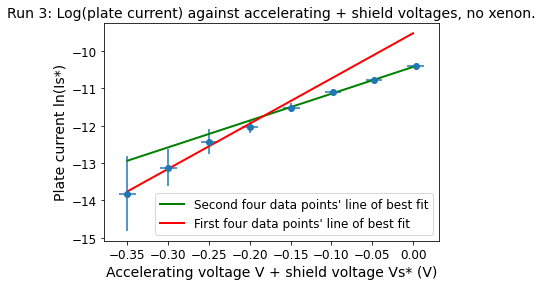

In [30]:
# Plotting data points with error bars.
plt.errorbar(V_plus_Vs_3[:9], ln_Is_star_extension_3[:9], 
             ln_Is_star_extension_error_3[:9], V_plus_Vs_error_3[:9],
             fmt = 'o')
# Line of best fit 1
pars1_3, cov1_3 = curve_fit(fitfunc, V_plus_Vs_3[0:4],  np.log(Is_star_extension_3)[0:4])

plt.plot(np.linspace(-.35,0,3), fitfunc(np.linspace(-.35,0,3), *pars1_3), 'g-'
         , linewidth = '2', label = "Second four data points' line of best fit")
print(pars1_3)
print(cov1_3)

# Line of best fit 2
pars2_3, cov2_3 = curve_fit(fitfunc, V_plus_Vs_3[4:8],  np.log(Is_star_extension_3)[4:8])

plt.plot(np.linspace(-.35,0,3), fitfunc(np.linspace(-.35,0,3), *pars2_3), 'r-'
         ,linewidth = '2', label = "First four data points' line of best fit")
print(pars2_3)
print(cov2_3)

plt.title("Run 3: Log(plate current) against accelerating + shield voltages, no xenon."
          , fontsize = 14)
plt.xlabel("Accelerating voltage V + shield voltage Vs* (V)", fontsize = 14)
plt.ylabel("Plate current ln(Is*)", fontsize = 14)
plt.legend()
plt.savefig("Extension run 3",dpi = 100, bbox_inches = "tight" )

In [31]:
print(pars2, cov2)
print(pars2_2, cov2_2)
print(pars2_3, cov2_3)

[11.52505454 -9.75369834] [[0.65266236 0.17928635]
 [0.17928635 0.05130261]]
[11.52505454 -9.75369834] [[0.65266236 0.17928635]
 [0.17928635 0.05130261]]
[12.09526572 -9.52544319] [[0.99195951 0.27246648]
 [0.27246648 0.07796072]]


## Putting extension into original

 Intersection of lines of best fit = Vc <br>
 pars[0] = slope <br>
 pars[1] = intersection with y axis <br>

<br>
y = pars1[0] * x + pars1[1] <br>
y = pars2[0] * x + pars2[1]

=> At the point of intersection : pars1[0] * x + pars1[1] = pars2[0] * x + pars2[1] <br>
=> x ( pars1[0] - pars2[0] ) = pars2[1] - pars1[1] <br>
=> x = $\frac{pars2[1] - pars1[1]}{pars1[0]-pars2[0]}$


Vc = -x, the absolute value of the x component of the point of intersection

In [40]:
# Intersection point following above derivation.

Vc_1 = -(pars2[1] - pars1[1]) /(pars1[0]-pars2[0])

Vc_2 = -(pars2_2[1] - pars1_2[1]) /(pars1_2[0]-pars2_2[0])

Vc_3 = -(pars2_3[1] - pars1_3[1]) /(pars1_3[0]-pars2_3[0])

Vc = 1/3 * (Vc_1 + Vc_2 +Vc_3)

In [41]:
# V_bar = -3/(2 * average slope of the red lines of best fit from the 3 runs ).
m = ( pars2[0] + pars2_2[0] + pars2_3[0] ) / 3
V_bar = 3/( 2 * m )


In [34]:
# Propagating error on Vc_1
Vc_1_error = np.sqrt((-1/(pars1[0]-pars2[0]))**2 * cov2[1,1] +
                     (-1/(pars1[0]-pars2[0]))**2 * cov1[1,1] +
                     ((pars2[1] - pars1[1]) /(pars1[0]-pars2[0])**2)**2 * cov1[0,0] +
                     (-(pars2[1] - pars1[1]) /(pars1[0]-pars2[0])**2)**2 * cov2[0,0])

# Propagating error on Vc_2
Vc_2_error = np.sqrt((-1/(pars1_2[0]-pars2_2[0]))**2 * cov2_2[1,1] +
                     (-1/(pars1_2[0]-pars2_2[0]))**2 * cov1_2[1,1] +
                     ((pars2_2[1] - pars1_2[1]) /(pars1_2[0]-pars2_2[0])**2)**2 * cov1_2[0,0] +
                     (-(pars2_2[1] - pars1_2[1]) /(pars1_2[0]-pars2_2[0])**2)**2 * cov2_2[0,0])

# Propagating error on Vc_3
Vc_3_error = np.sqrt((-1/(pars1_3[0]-pars2_3[0]))**2 * cov2_3[1,1] +
                     (-1/(pars1_3[0]-pars2_3[0]))**2 * cov1_3[1,1] +
                     ((pars2_3[1] - pars1_3[1]) /(pars1_3[0]-pars2_3[0])**2)**2 * cov1_3[0,0] +
                     (-(pars2_3[1] - pars1_3[1]) /(pars1_3[0]-pars2_3[0])**2)**2 * cov2_3[0,0])

# Propagating error on Vc.
# Vc = 
Vc_error = np.sqrt( 1/3**2 * Vc_1_error**2 +
                    1/3**2 * Vc_2_error**2 +
                    1/3**2 * Vc_3_error**2 )



# The errors on the slopes are the square roots of the 1,1 entry in the covariance matrix
# corresponding to that line of best fit.

m_error = np.sqrt( 1/3**2 * np.sqrt(cov2[0,0])**2 +
                   1/3**2 * np.sqrt(cov2_2[0,0])**2 +
                   1/3**2 * np.sqrt(cov2_3[0,0])**2 ) 

# Error on V_bar is the propagation of the errors on the 3 lines of best fit
V_bar_error = (3/(2 * m**2))**2 * m_error**2


e_momentum_extension = np.sqrt(V - Vs + Vc + V_bar)

# Propagation error onto e_momentum_extension
e_momentum_extension_error = np.sqrt( ( (V - Vs + Vc + V_bar)**(-1/2) / 2)**2 * V_error**2 +
                                      ( (V - Vs + Vc + V_bar)**(-1/2) / 2)**2 * Vs_error**2 +
                                      ( (V - Vs + Vc + V_bar)**(-1/2) / 2)**2 * Vc_error**2 +
                                      ( (V - Vs + Vc + V_bar)**(-1/2) / 2)**2 * V_bar_error**2)



0.039013029945759496
0.05998043357285666
0.07379276246493556
0.06822847166795011


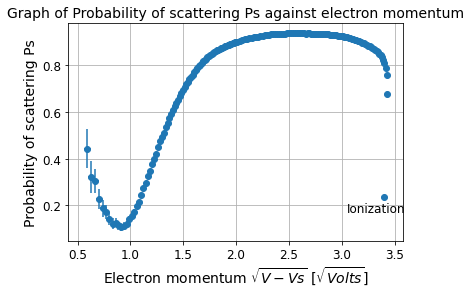

In [39]:
## Plotting probability of scattering against corrected electron momentum
# Creating graph of Probability of scattering against electron momentum
plt.errorbar(e_momentum_extension[1:-10], Ps[1:-10], Ps_error[1:-10],
             e_momentum_extension_error[1:-10],
             fmt = 'o')


plt.title("Graph of Probability of scattering Ps against electron momentum"
          , fontsize = 14)
plt.xlabel('Electron momentum $\sqrt{V-Vs}$ [$\sqrt{Volts}$]', fontsize = 14)
plt.ylabel("Probability of scattering Ps", fontsize = 14)

plt.text(3.05, 0.17,"Ionization")
plt.grid(True)
plt.savefig("Ps graph extension")

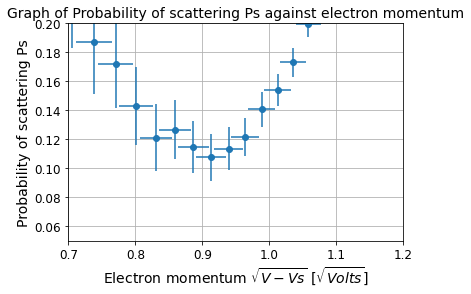

In [38]:
# Zooming in on the local minimum of probability of scattering.

plt.errorbar(e_momentum_extension[1:20], Ps[1:20], Ps_error[1:20],
             e_momentum_extension_error[1:20],
             fmt = 'o')


plt.title("Graph of Probability of scattering Ps against electron momentum",
          fontsize = 14)
plt.xlabel('Electron momentum $\sqrt{V-Vs}$ [$\sqrt{Volts}$]', fontsize = 14)
plt.ylabel("Probability of scattering Ps", fontsize = 14)


plt.axis([0.7,1.2,0.05,0.2])
plt.grid(True)
plt.savefig("Ps graph, extension zoom")

In [43]:
print(e_momentum_extension[1:20])
print(Ps)

[0.59100832 0.6314197  0.66909703 0.70469202 0.73837039 0.77044847
 0.8014305  0.83089761 0.8593549  0.88678681 0.91339523 0.93919691
 0.96425663 0.98863079 1.01241831 1.03561134 1.05824895 1.08031979
 1.1020394 ]
[ 0.49346405  0.44250871  0.32340426  0.30566038  0.22590964  0.18697422
  0.17167872  0.14285714  0.12091792  0.12653689  0.11464497  0.10756312
  0.11355888  0.12134403  0.14078462  0.15403983  0.17308445  0.19950739
  0.21621622  0.24446813  0.27335871  0.29493118  0.32443576  0.34752589
  0.37626263  0.39845216  0.42112708  0.44989917  0.47437838  0.49478081
  0.51093211  0.53415233  0.5543149   0.57311054  0.59174609  0.60806193
  0.62426412  0.63848418  0.65155805  0.66795303  0.67948718  0.69515471
  0.70835455  0.71812766  0.73030475  0.74109778  0.75042395  0.76022948
  0.77007149  0.77941162  0.78835706  0.79498358  0.80279126  0.80940807
  0.81701117  0.8225627   0.82808261  0.83330044  0.83856515  0.84344956
  0.84805981  0.8511303   0.8554218   0.8612967   0.8638